# Credit card fraud dataset

I am using this [dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data), because besides TSAD applicability, it has many features and would be an interesting showcase for a logistic regression implementation.

From Kaggle: The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

We will check out the stats and percentages they brought up in this description.

In [1]:
! pip install kagglehub pandas matplotlib numpy scikit-learn imbalanced-learn seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import kagglehub
from kagglehub import KaggleDatasetAdapter

print("All imports successful!")

All imports successful!


## 1. Inspecting the dataset

Here we use common pandas commands to get a feel for our dataset. First we can inspect the shape to see there actually is 284,807 transactions.

In [3]:
file_path = "creditcard.csv"

# Load the latest version
df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "mlg-ulb/creditcardfraud",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df.shape

Using Colab cache for faster access to the 'creditcardfraud' dataset.


(284807, 31)

In [4]:
print("First 5 records:")
print(df.head())

First 5 records:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26    

### 1a. The data is hard to read

We can see that there are only 3 features that have meaningful names: `Time`, `Amount`, and `Class`. The rest are just variables 1-28. This is done on purpose for confidentiality using something called a **PCA Transformation**, it's beyond my understanding but basically the original data was transformed in a way that kept its statistical meaningfulness.

Let's inspect the detected anomalies (credit card fraud) where `Class == 1`.

In [5]:
print(df[df['Class'] == 1].head())

        Time        V1        V2        V3        V4        V5        V6  \
541    406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623    472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4920  4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
6108  6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
6329  7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   

            V7        V8        V9  ...       V21       V22       V23  \
541  -2.537387  1.391657 -2.770089  ...  0.517232 -0.035049 -0.465211   
623   0.325574 -0.067794 -0.270953  ...  0.661696  0.435477  1.375966   
4920  0.562320 -0.399147 -0.238253  ... -0.294166 -0.932391  0.172726   
6108 -3.496197 -0.248778 -0.247768  ...  0.573574  0.176968 -0.436207   
6329  1.713445 -0.496358 -1.282858  ... -0.379068 -0.704181 -0.656805   

           V24       V25       V26       V27       V28  Amount  Class  
541   0.320198  0.044519  0.1778

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

### 1b. Exploratory data analysis (EDA)

We have taken a look at how our dataset looks in raw numbers. Despite the V# features not being very meaningful currently, we see that some expected behavior is happening in each column.

For example the min of `Time` is 0 and the max is the end of the sample 172192. On Kaggle they mentioned this was a 2-day sample, which about aligns with the amount of seconds in two days. (48 hours/min * 60 mins/hour * 60 seconds/min) = 172800 seconds

Another interesting example is how the max of amount is $25,691. One big purchase.

Let's look at some plots.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


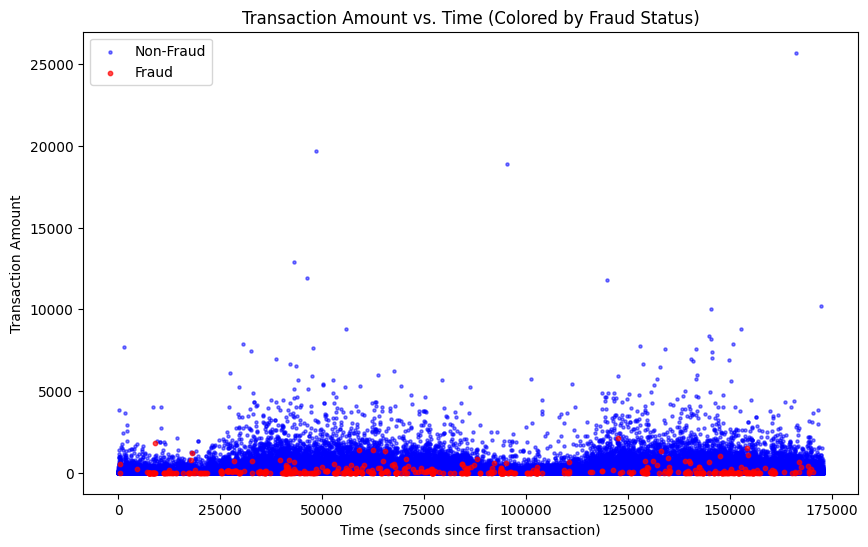

In [8]:
non_fraud = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

# create the scatter plot
plt.figure(figsize=(10, 6)) # Make the plot a bit larger

# plot non-fraud transactions in blue
plt.scatter(non_fraud['Time'], non_fraud['Amount'], alpha=0.5, label='Non-Fraud', color='blue', s=5) # s=5 makes points smaller

# make fraud points slightly larger
plt.scatter(fraud['Time'], fraud['Amount'], alpha=0.7, label='Fraud', color='red', s=10)

# add labels and title
plt.xlabel("Time (seconds since first transaction)")
plt.ylabel("Transaction Amount")
plt.title("Transaction Amount vs. Time (Colored by Fraud Status)")
plt.legend()
plt.show()

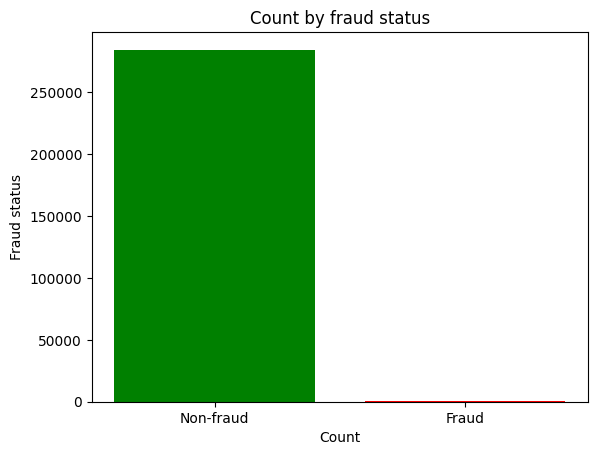

In [9]:
class_counts = df['Class'].value_counts()

plt.bar(['Non-fraud', 'Fraud'], class_counts.values, color=['green', 'red'])

plt.xlabel("Count")
plt.ylabel("Fraud status")
plt.title("Count by fraud status")
plt.show()

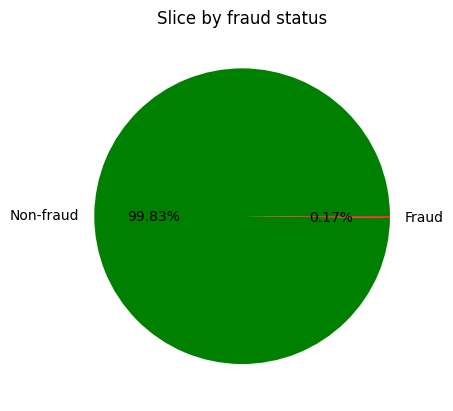

In [10]:
plt.pie(class_counts, labels=['Non-fraud', 'Fraud'], colors=['green', 'red'], autopct="%1.2f%%")
plt.title("Slice by fraud status")

plt.show()

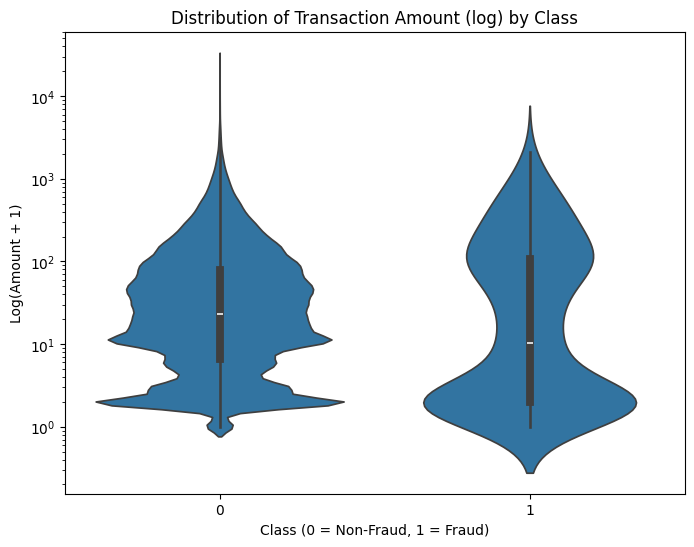

In [11]:
plt.figure(figsize=(8, 6))
plt.title("Distribution of Transaction Amount (log) by Class")
sns.violinplot(x='Class', y=df['Amount'] + 1, data=df, log_scale=10)
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Log(Amount + 1)")
plt.show()

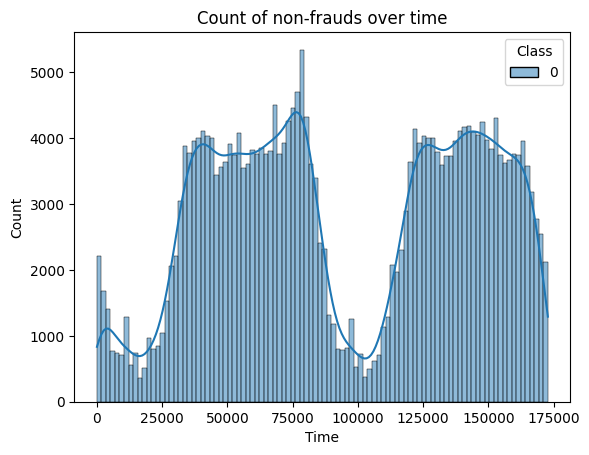

In [12]:
plt.title("Count of non-frauds over time")
sns.histplot(data=df[df['Class'] == 0], x='Time', hue='Class', bins=100, kde=True)
plt.xlabel("Time")
plt.ylabel("Count")
plt.show()

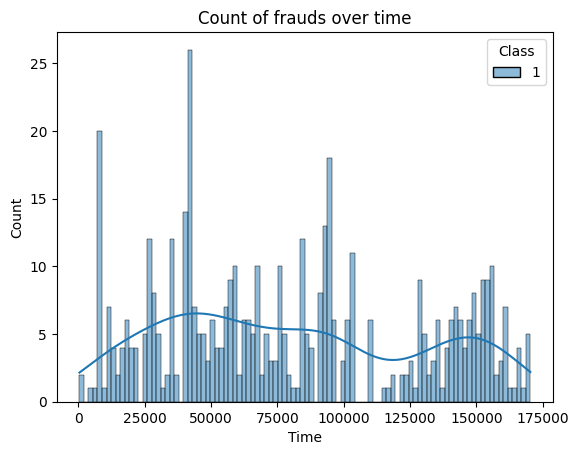

In [13]:
plt.title("Count of frauds over time")
sns.histplot(data=df[df['Class'] == 1], x='Time', hue='Class', bins=100, kde=True)
plt.xlabel("Time")
plt.ylabel("Count")
plt.show()

Bottom row is most important, showing any correlation between class and the features. It is also interesting to notice that some classes are correlated and may be redundant.

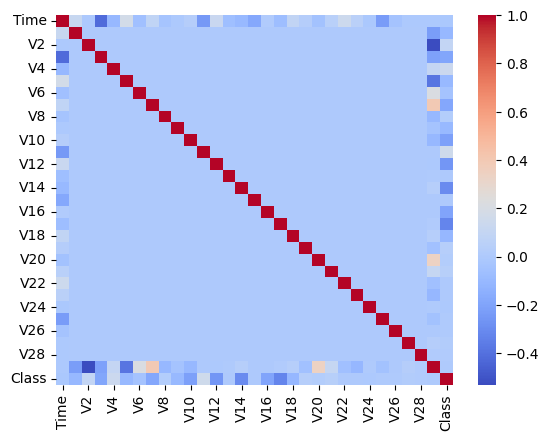

In [14]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

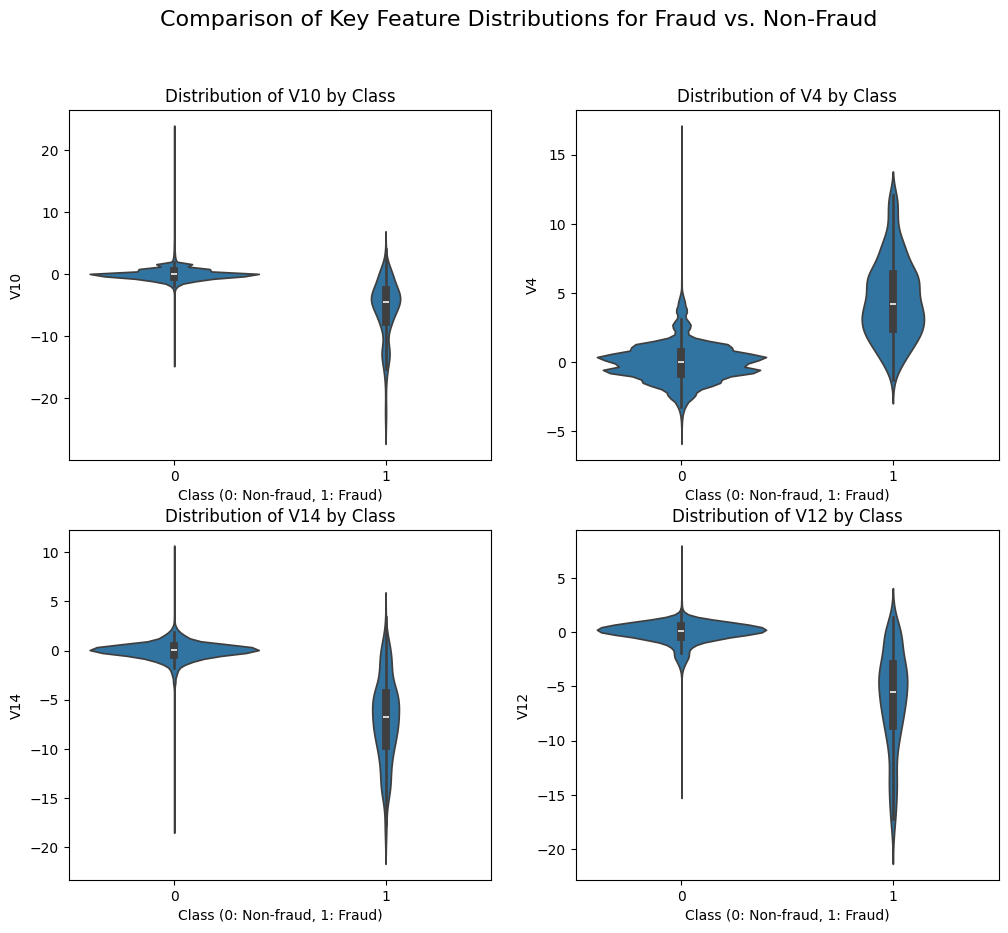

In [15]:
features_to_plot = ['V10', 'V4', 'V14', 'V12']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes_flat = axes.flatten()

for i, feature in enumerate(features_to_plot):
    current_ax = axes_flat[i]

    sns.violinplot(x='Class', y=feature, data=df, ax=current_ax)
    current_ax.set_title(f'Distribution of {feature} by Class')
    current_ax.set_xlabel('Class (0: Non-fraud, 1: Fraud)')

fig.suptitle('Comparison of Key Feature Distributions for Fraud vs. Non-Fraud', fontsize=16)
plt.show()

## 2. Solving the imbalance

Here we can now clearly see there is a *class imbalance*. If we were to train the model on this dataset, it would not have enough cases of fraud to properly classify a fraud.

One common way to deal with this issue is a data augmentation technique called *oversampling*. This technique aims to increase our minority class samples through replication of existing data points or synthetic generation of new ones.

The method I will use here (SMOTE) is a bit advanced, but `imbalanced-learn` helps out alot in streamlining the process.

In [16]:
X = df.drop('Class', axis=1)
y = df['Class']
random_state = 7

# stratify will ensure that both train and test have same percentage of fraud
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state, stratify=y)

# scale the features, never bad for your model
# also helps in preventing overflow for sigmoid function
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# only transform to prevent data leakage
X_test_scaled = scaler.transform(X_test)

print(f'Original training shape: {np.bincount(y_train)}')

smote = SMOTE(random_state=random_state)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print(f'Resampled training shape: {np.bincount(y_train_resampled)}')

Original training shape: [213236    369]
Resampled training shape: [213236 213236]


### 50/50 split between non-fraud and frauds.

Synthetic minority oversampling technique (SMOTE) will find the k-nearest neighbors (that are also frauds) to every fraud and generate a new fraud that is on the line in between the original sample and the neighbor.

This will be repeated until our minority class (fraud) is balanced with the majority as shown above.



## Implementing logistic regression

Here these are the direct ideas from Andrew Ng course. I also implemented early stopping to help combat overfitting.

In [17]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    m = X.shape[0]
    w = w_in
    b = b_in
    cost_history = []

    patience = 5
    patience_counter = 0
    epsilon = 0.00001
    last_cost = float('inf')
    # to avoid log(0) we can use clipping
    clipping_epsilon = 1e-9
    cost = 0

    for i in range(num_iters):

        z = np.dot(X, w) + b

        predictions = 1 / (1 + np.exp(-z))

        error = predictions - y

        dj_dw = (1/m) * np.dot(X.T, error)
        dj_db = (1/m) * np.sum(error)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # use for cost functions because numerically unstable
        predictions_clipped = np.clip(predictions, clipping_epsilon, 1-clipping_epsilon)
        cost = (-1/m) * np.sum(y * np.log(predictions_clipped) + (1 - y) * np.log(1 - predictions_clipped)) # simplfied from piecewise
        cost_history.append(cost)

        if last_cost - cost < epsilon:
            patience_counter += 1
        else:
            patience_counter = 0

        if patience_counter >= patience:
            print(f'Stopping early at iteration {i}')
            break

        last_cost = cost

    return w, b, cost_history


### Testing model and visualizing performance

In [18]:
w_init = np.zeros(X_train.shape[1]) # cols
b_init = 0
learning_rate = 0.1
iterations = 1000

w_final, b_final, history = gradient_descent(X_train_resampled, y_train_resampled, w_init, b_init, learning_rate, iterations)

print(f"Final w: {w_final}")
print(f"Final b: {b_final}")

Stopping early at iteration 866
Final w: [-0.29882115  0.08367467  0.086409   -0.04003999  0.88280913  0.26663477
 -0.19707077  0.12196799 -0.33714077 -0.17254975 -0.4391196   0.33417169
 -0.45810261 -0.36643438 -0.72348089  0.13564938 -0.15167507 -0.06861367
  0.06688264 -0.04722963 -0.01735277  0.05996075  0.25892078 -0.05206003
  0.00835221  0.06419879 -0.28164733  0.14674961  0.09333044  0.22703497]
Final b: -2.824251814729858


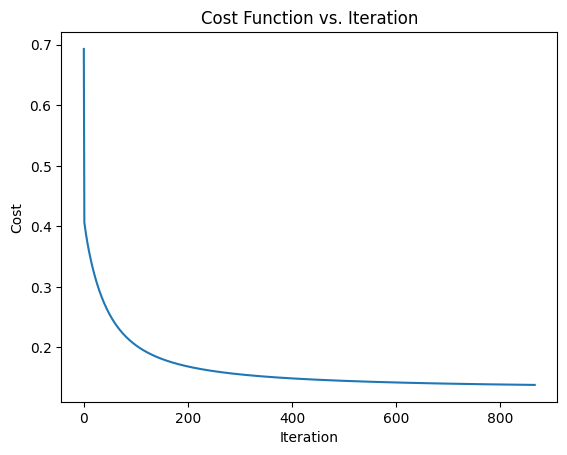

In [19]:
# cost history
plt.figure() # Create a new figure
plt.plot(history)
plt.title("Cost Function vs. Iteration")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

#### Feature importance



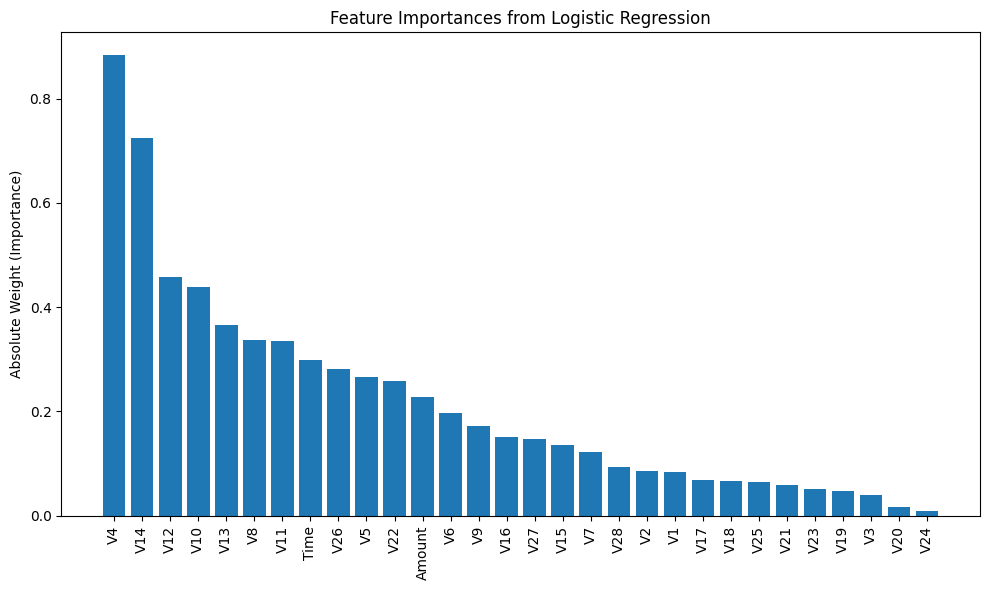

In [20]:
X_names = df.drop('Class', axis=1)
feature_names = X_names.columns

importances = np.abs(w_final)

plt.figure(figsize=(10,6))

# sort indices in decreasing order
indices = np.argsort(importances)[::-1]
# num of features, then importances by decreasing order sort indices
plt.bar(range(X_train_resampled.shape[1]), importances[indices])
plt.xticks(range(X_train_resampled.shape[1]), feature_names[indices], rotation=90)
plt.ylabel("Absolute Weight (Importance)")
plt.title("Feature Importances from Logistic Regression")
plt.tight_layout()
plt.show()

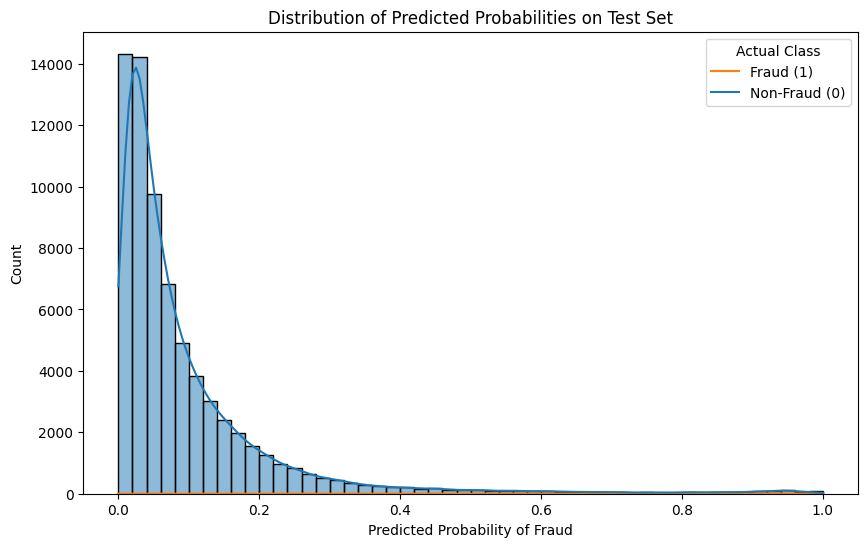

In [21]:
# Use scaled test to accurately use our resulting weights
z_test = np.dot(X_test_scaled, w_final) + b_final
probabilities_test = 1 / (1 + np.exp(-z_test))

# create dataframe for plotting
df_plot = pd.DataFrame({'Probability': probabilities_test, 'Actual': y_test})

# plot distributions fraud and non-fraud
plt.figure(figsize=(10, 6))
sns.histplot(data=df_plot, x='Probability', hue='Actual', kde=True, bins=50)
plt.title('Distribution of Predicted Probabilities on Test Set')
plt.xlabel('Predicted Probability of Fraud')
plt.ylabel('Count')
plt.legend(title='Actual Class', labels=['Fraud (1)', 'Non-Fraud (0)']) # Adjust labels if needed based on hue order
plt.show()

#### Confusion Matrix

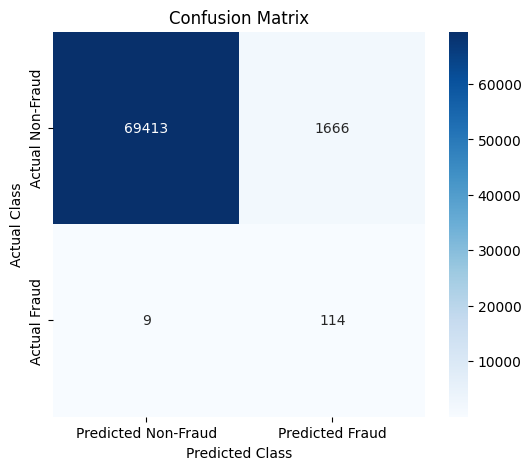

In [22]:
# this threshold is a standard
# note that following the plot above, if we made the threshold higher, then precision would increase
threshold = 0.5
# convert our probabilities to binary predictions: 1 or 0
predictions_binary = (probabilities_test >= threshold).astype(int)

TP = np.sum((predictions_binary == 1) & (y_test == 1))
TN = np.sum((predictions_binary == 0) & (y_test == 0))
FP = np.sum((predictions_binary == 1) & (y_test == 0))
FN = np.sum((predictions_binary == 0) & (y_test == 1))

conf_matrix = np.array([[TN, FP],
                        [FN, TP]])

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Non-Fraud', 'Predicted Fraud'],
            yticklabels=['Actual Non-Fraud', 'Actual Fraud'])
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.title('Confusion Matrix')
plt.show()

#### F1-score

In [23]:
from sklearn.metrics import f1_score, precision_score, recall_score

precision_sk = precision_score(y_test, predictions_binary)
recall_sk = recall_score(y_test, predictions_binary)
f1_sk = f1_score(y_test, predictions_binary)

print(f"Precision: {precision_sk:.4f}")
print(f"Recall:    {recall_sk:.4f}")
print(f"F1 Score:  {f1_sk:.4f}")

Precision: 0.0640
Recall:    0.9268
F1 Score:  0.1198


#### ROC-AUC


Model AUC Score: 0.9836


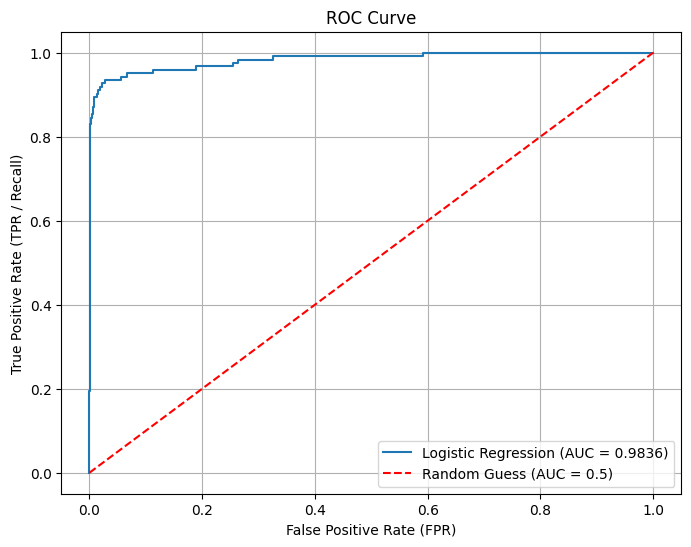

In [24]:
from sklearn.metrics import roc_auc_score, roc_curve

# we calculated these earlier but for clarity again
z_test = np.dot(X_test_scaled, w_final) + b_final
probabilities_test = 1 / (1 + np.exp(-z_test))

# main number we care about (AUC)
auc_score = roc_auc_score(y_test, probabilities_test)
print(f"\nModel AUC Score: {auc_score:.4f}")

# this function will calculate all the TPRs and FPRs
fpr, tpr, thresholds = roc_curve(y_test, probabilities_test)

plt.figure(figsize=(8, 6))
# plot the model's ROC curve
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.4f})')
# random guess line
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess (AUC = 0.5)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR / Recall)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

## Results 🚀

Recall tells us that my model catches 92.68% of all fraud at a `0.5` threshold!! However, the precision is terrible as is to be expected with SMOTE, the model got too good at recognizing the artificial patterns.

an AUC score of `0.9836` means that the model is doing amazingly in discriminating between the two classes. SMOTE was crucial in the preprocessing step for the model to learn the frauds effectively.